# Table of Contents:
* [1. Overview](#1)
 *  [1.1 Background Information](#1.1)
 *  [1.2 Problem Statement](#1.2)

* [2. Data Description](#2)

* [3. Data Preparation and Cleaning](#3)
 * [3.1 Load the Dataset](#3.1)
 * [3.2 Normalize the Dataset](#3.2)
 * [3.3 Save Dataset to csv](#3.3)

* [4. Data Exploration](#4)
 * [4.1 Exploring Text Categories](#4.1)
 * [4.2 Exploring the Dataset as a Whole](#4.2)
 * [4.3 Exploring the Data Using Sentiments](#4.3)
 
* [5. Summary of Key Findings](#5)

# 1. Overview <a class="anchor" id="1"></a>

## 1.1 Background Information<a class="anchor" id="1.1"></a>

<div style="text-align: justify">Natural language processing (NLP) is a discipline of artificial intelligence that deals with the interaction between computers and humans through the natural language. The main objective of NLP is to analyze, decipher and to aid in better understanding the human language and forms of communication; verbal (voice commands to a machine), non-verbal (processing text data) or both (audio to text conversion). One of the many applications of NLP is to conduct sentiment analysis on text. Simply stated, sentiment analysis is the process of determining whether textual data is either positive, negative or neutral through the combined use of NLP and machine learning techniques. Sentiment analysis can be a valuable tool for large enterprises and content creators to gauge public opinion on their products and services, perform market research and monitor their reputation. A popular application of sentiment analysis involves it's use to analyze movie reviews. Movie rating websites such as IMDb and rotten tomatoes are used by both critics and viewers as a vehicle to express their love, appreciation or their distain for the latest movies and tv shows. Websites such the these can drastically affect the perfomance (box office), ratings and the general public's view of a movie or tv show, as many potential viewers often use the reviews and metrics provided by these websites to decide if something is worth watching. Sentiment analysis of a movie review can be used to determine whether it was positive or negative, which in turn, can be used to determine an overall rating.

## 1.2 Problem Statement <a class="anchor" id="1.2"></a>

<div style="text-align: justify">The objective of this project is to develop a model using the machine learning life cycle principles studied in this course to perform sentiment analysis on movie reviews. The model will take written reviews and classify them as expressing either a positive or negative sentiment. This document presents the deliverables required as part of milestone 1 which is the data description, preparation and exploration. 

# 2. Data Description <a class="anchor" id="2"></a>

<div style="text-align: justify">The data used in the project is the Large Movie Review Dataset, obtained from the ai.standford.edu website. The dataset contains 25k reviews, which were subdivided into two separate folders, positive and negative. Each folder contains 12.5k reviews stored in a numbered text file. The reviews were obtained from IMDb, which is a website that has movie reviews, ratings and overall film and television content. Users are able to rate content on a scale of 1 to 10, for this dataset, the original authors decided to considers reviews with a rating greater or equal to 7 as being positive and reviews with a rating less than or equal to 4 as being negative. Reviews which had ratings equal to 5 or 6 were not incorporated into the dataset. Lastly, it is important to note that the data that was provided is balanced, as there is an equal amount of both positive and negative reviews.
<br>
<br>
For the purpose of this project, a subset of the original dataset was used for the data preparation, cleaning and exploration. We selected 7k reviews, 3.5k positive and 3.5k negative. Prior to the start of our analysis, the individual text files which contained the reviews were combined into a single tsv file titled Movie_Reviews.tsv.   

# 3. Data Preparation and Cleaning <a class="anchor" id="3"></a>

In [1]:
import pandas as pd
import numpy as np
import text_normalizer as tn
import model_evaluation_utils as meu

np.set_printoptions(precision=2, linewidth=80)

## 3.1 Load the dataset  <a class="anchor" id="3.1"></a>

In [4]:
dataset = pd.read_csv(r'Movie_Reviews.tsv',sep = '\t')
dataset = dataset.drop(columns=['Unnamed: 0'])

In [8]:
# take a peek at the data
print(dataset.head())
reviews = np.array(dataset['Review'])
sentiments = np.array(dataset['Sentiment'])

## 3.2 Normalize the dataset  <a class="anchor" id="3.2"></a>

In [1]:
# Normalize the data
norm_reviews = tn.normalize_corpus(reviews)

## 3.3 Save cleaned data to csv  <a class="anchor" id="3.3"></a>

In [2]:
# Save the normalized dataframe for later use
df = pd.DataFrame({'Reviews': norm_reviews, 'Sentiments': sentiments}, columns=['Reviews', 'Sentiments'])
df.to_csv('Movie_Reviews_Clean.csv')

# 4. Data Exploration <a class="anchor" id="4"></a>

### Load cleaned data

In [2]:
dataset = pd.read_csv('Movie_Reviews_Clean.csv')
#remove extra column
dataset = dataset.drop(columns=['Unnamed: 0'])

## 4.1 Exploring Text Categories  <a class="anchor" id="4.1"></a>

In [3]:
# list column names and datatypes
dataset.dtypes

Reviews       object
Sentiments    object
dtype: object

In [4]:
#data frame length
len(dataset)

7000

In [5]:
#number of values per column
dataset.count()

Reviews       7000
Sentiments    7000
dtype: int64

In [6]:
# select a sample of some data frame columns
pd.set_option('display.max_colwidth',False)
dataset[['Reviews','Sentiments']] \
  .sample(2, random_state=42)

,Reviews,Sentiments
6500,anybody really want understand hitler read wwi history not wwii history find happen war soldier live around dead corpse time many soldier go insane see wwi time call shellshocke call post traumatic stress disorder learn true horror wwi begin understand hitler understand human become desensitize death not evil simply way cope horror around movie unfortunately miss many read book subject watch movie path glory good wwi movie ever make see frustration soldier movie sense helplessness utter devaluation human life nothing bullet catcher movie miss really key point understand germany lose war million million germans lose life no real reason come utter economic collapse follow war factor create extremism loss family member massive poverty create always lead extremism unfortunately movie ignore factor become another throw away piece crap throw pile really no real value fictional movie base upon fictional character could give well idea hitler throw hitlers name would sell,negative
2944,production quality cast premise authentic new england waterbury ct locale lush john williams score result 3 4 star collector item unfortunately get passable 2 star decent flick mostly memorable try bring art house style film mainstream small town locale story ordinary people genre well satisfy grownup jane fonda unable hide braininess enough make character believable wonder not post doctorate yale instead work dead end factory job waterbury robert diniros character bit contrived illiterate nice guy loser turn actually little help janes character 1990 version henry ford thomas edison genre successfully handle nobodys fool mid 90 year 2003 schmidt wish main stream studio would try stuff post adolescent reserve couple screen multi cinema complex effort give effort,positive


In [7]:
# describe categorical columns of type np.object 
dataset[['Reviews','Sentiments']] \
  .describe(include=np.object) \
  .transpose()

,count,unique,top,freq
Reviews,7000,6988,get movie free job along three similar movie watch low expectation movie not bad per se get pay tale love betrayal lie sex scandal everything want movie definitely not hollywood blockbuster cheap thrill not bad would probably never watch movie nutshell kind movie would see either late night local television station want take time would see sunday afternoon local television station try take time despite bad acting cliche line sub par camera work not desire turn movie pretend like never pop dvd player story many time many movie one no different no well no bad average movie,3
Sentiments,7000,2,positive,3501


### 4.1.1 Creating Plots to count the length and words 


Text(0, 0.5, 'Number of reviews')

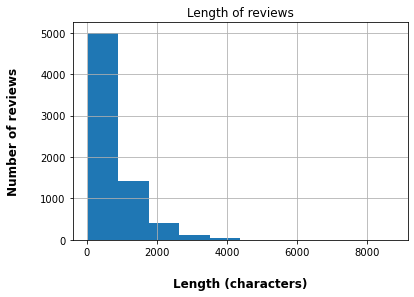

In [8]:
#check length of reviews
review_length_hist = dataset['Reviews'].str.len().hist()
review_length_hist.set_title("Length of reviews")
review_length_hist.set_xlabel("Length (characters)", labelpad=20, weight='bold', size=12)
review_length_hist.set_ylabel("Number of reviews", labelpad=20, weight='bold', size=12)

Text(0, 0.5, 'Number of reviews')

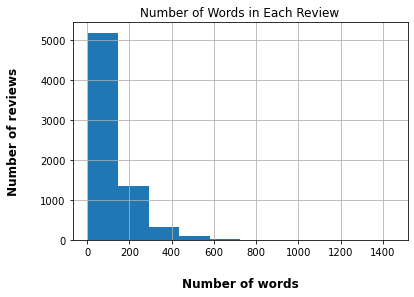

In [9]:
#number of words in each review
num_of_words_hist = dataset["Reviews"].str.split().\
    map(lambda x: len(x)).\
    hist()
num_of_words_hist.set_title("Number of Words in Each Review")
num_of_words_hist.set_xlabel("Number of words", labelpad=20, weight='bold', size=12)
num_of_words_hist.set_ylabel("Number of reviews", labelpad=20, weight='bold', size=12)

Text(0, 0.5, 'Number of reviews')

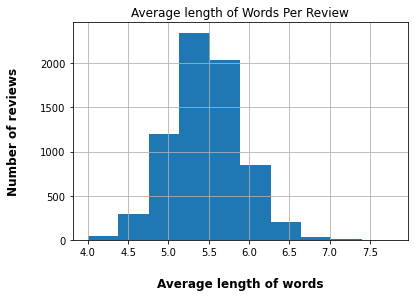

In [10]:
#check average length of words in each sentence
import numpy as np
length_of_words_hist = dataset['Reviews'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()
length_of_words_hist.set_title("Average length of Words Per Review")
length_of_words_hist.set_xlabel("Average length of words", labelpad=20, weight='bold', size=12)
length_of_words_hist.set_ylabel("Number of reviews", labelpad=20, weight='bold', size=12)

### 4.1.2 Checking for unique values

In [11]:
dataset['Reviews'].value_counts()[:10]

get movie free job along three similar movie watch low expectation movie not bad per se get pay tale love betrayal lie sex scandal everything want movie definitely not hollywood blockbuster cheap thrill not bad would probably never watch movie nutshell kind movie would see either late night local television station want take time would see sunday afternoon local television station try take time despite bad acting cliche line sub par camera work not desire turn movie pretend like never pop dvd player story many time many movie one no different no well no bad average movie                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [12]:
# number of unique values = count distinct
dataset['Reviews'].nunique()

6988

## 4.2 Exploring the Dataset as a Whole  <a class="anchor" id="4.2"></a>

### 4.2.1 Creating a list of tokens

In [13]:
# Define tokenizer function
def my_tokenizer(text):
    return text.split() if text != None else []

In [14]:
# transform list of documents into a single list of tokens
tokens = dataset.Reviews.map(my_tokenizer).sum()

In [15]:
print(tokens[:200])

['bromwell', 'high', 'cartoon', 'comedy', 'run', 'time', 'program', 'school', 'life', 'teacher', '35', 'year', 'teaching', 'profession', 'lead', 'believe', 'bromwell', 'highs', 'satire', 'much', 'close', 'reality', 'teacher', 'scramble', 'survive', 'financially', 'insightful', 'student', 'see', 'right', 'pathetic', 'teacher', 'pomp', 'pettiness', 'whole', 'situation', 'remind', 'school', 'know', 'student', 'see', 'episode', 'student', 'repeatedly', 'try', 'burn', 'school', 'immediately', 'recall', 'high', 'classic', 'line', 'inspector', 'sack', 'one', 'teacher', 'student', 'welcome', 'bromwell', 'high', 'expect', 'many', 'adult', 'age', 'think', 'bromwell', 'high', 'far', 'fetch', 'pity', 'not', 'homelessness', 'houselessness', 'george', 'carlin', 'state', 'issue', 'year', 'never', 'plan', 'help', 'street', 'consider', 'human', 'everything', 'go', 'school', 'work', 'vote', 'matter', 'people', 'think', 'homeless', 'lost', 'cause', 'worry', 'thing', 'racism', 'war', 'iraq', 'pressure', '

### 4.2.2 Counting frequencies with a counter

In [16]:
#count 20 most common tokens
from collections import Counter

counter = Counter(tokens)
counter.most_common(20)

[('not', 17988),
 ('movie', 14396),
 ('film', 13101),
 ('one', 7767),
 ('see', 6709),
 ('make', 6338),
 ('like', 6110),
 ('good', 5852),
 ('get', 5031),
 ('well', 4676),
 ('time', 4463),
 ('would', 4406),
 ('character', 3982),
 ('go', 3824),
 ('watch', 3779),
 ('bad', 3763),
 ('story', 3759),
 ('no', 3460),
 ('even', 3426),
 ('think', 3215)]

In [17]:
print([t[0] for t in counter.most_common(200)])  

['not', 'movie', 'film', 'one', 'see', 'make', 'like', 'good', 'get', 'well', 'time', 'would', 'character', 'go', 'watch', 'bad', 'story', 'no', 'even', 'think', 'really', 'show', 'scene', 'great', 'look', 'much', 'know', 'could', 'say', 'first', 'people', 'give', 'also', 'take', 'way', 'come', 'love', 'find', 'thing', 'play', 'end', 'man', 'life', 'work', 'seem', 'year', 'two', 'plot', 'never', 'actor', 'many', 'want', 'little', 'may', 'try', 'ever', 'still', 'feel', 'old', 'director', 'woman', 'part', 'back', 'acting', 'use', 'lot', 'something', 'real', 'performance', 'funny', 'nothing', 'star', 'new', 'though', 'guy', 'tell', 'role', 'big', 'cast', 'us', 'become', 'horror', 'point', 'start', 'another', 'long', 'actually', 'day', 'turn', 'leave', 'young', 'fact', 'every', 'comedy', 'world', 'quite', 'action', 'girl', 'act', 'happen', 'series', 'pretty', 'minute', 'however', 'set', 'line', 'around', 'right', 'script', 'always', 'family', 'enough', 'need', 'bit', 'fan', 'last', 'kill',

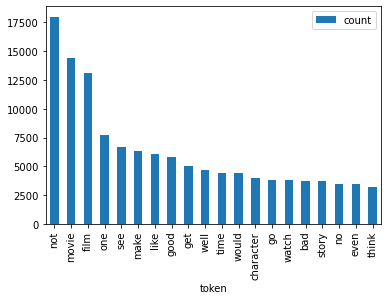

In [18]:
# convert list of tuples into data frame
frequency_dataset = pd.DataFrame.from_records(counter.most_common(20),
                                    columns=['token', 'count'])

# create bar plot
frequency_dataset.plot(kind='bar', x='token');

### 4.2.3 Creating a word cloud

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

In [20]:
from wordcloud import WordCloud

def wordcloud(counter):
    """A small wordloud wrapper"""
    wc = WordCloud(width=1200, height=800, 
                   background_color="white", 
                   max_words=200) 
    wc.generate_from_frequencies(counter)

    # Plot
    fig=plt.figure(figsize=(6, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

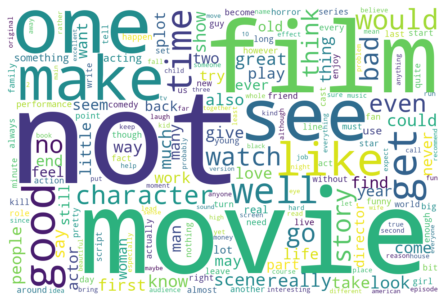

In [21]:
# create wordcloud
wordcloud(counter)

## 4.3 Exploring the Data Using Sentiments  <a class="anchor" id="4.3"></a>

In [22]:
dataset['no_tokens'] = dataset.Reviews\
  .map(lambda l: 0 if l==None else len(l.split()))

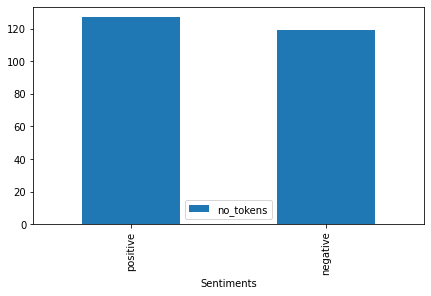

In [23]:
# mean number of tokens by category
dataset.groupby(['Sentiments']) \
  .agg({'no_tokens':'mean'}) \
  .sort_values(by='no_tokens', ascending=False) \
  .plot(kind='bar', figsize=(7,4));

### 4.3.1 Outlier exploration

In [24]:
%config InlineBackend.figure_format = 'retina'

import seaborn as sns

def multi_boxplot(data, x, y, ylim = None):
    '''Wrapper for sns boxplot with cut-off functionality'''
    # plt.figure(figsize=(30, 5))
    fig, ax = plt.subplots()
    plt.xticks(rotation=90) 

    # order boxplots by median
    ordered_values = data.groupby(x)[[y]] \
                         .median() \
                         .sort_values(y, ascending=False) \
                         .index
        
    sns.boxplot(x=x, y=y, data=data, palette='Set2', 
                order=ordered_values)

    fig.set_size_inches(11, 6)
    
    # cut-off y-axis at value ylim
    ax.set_ylim(0, ylim)

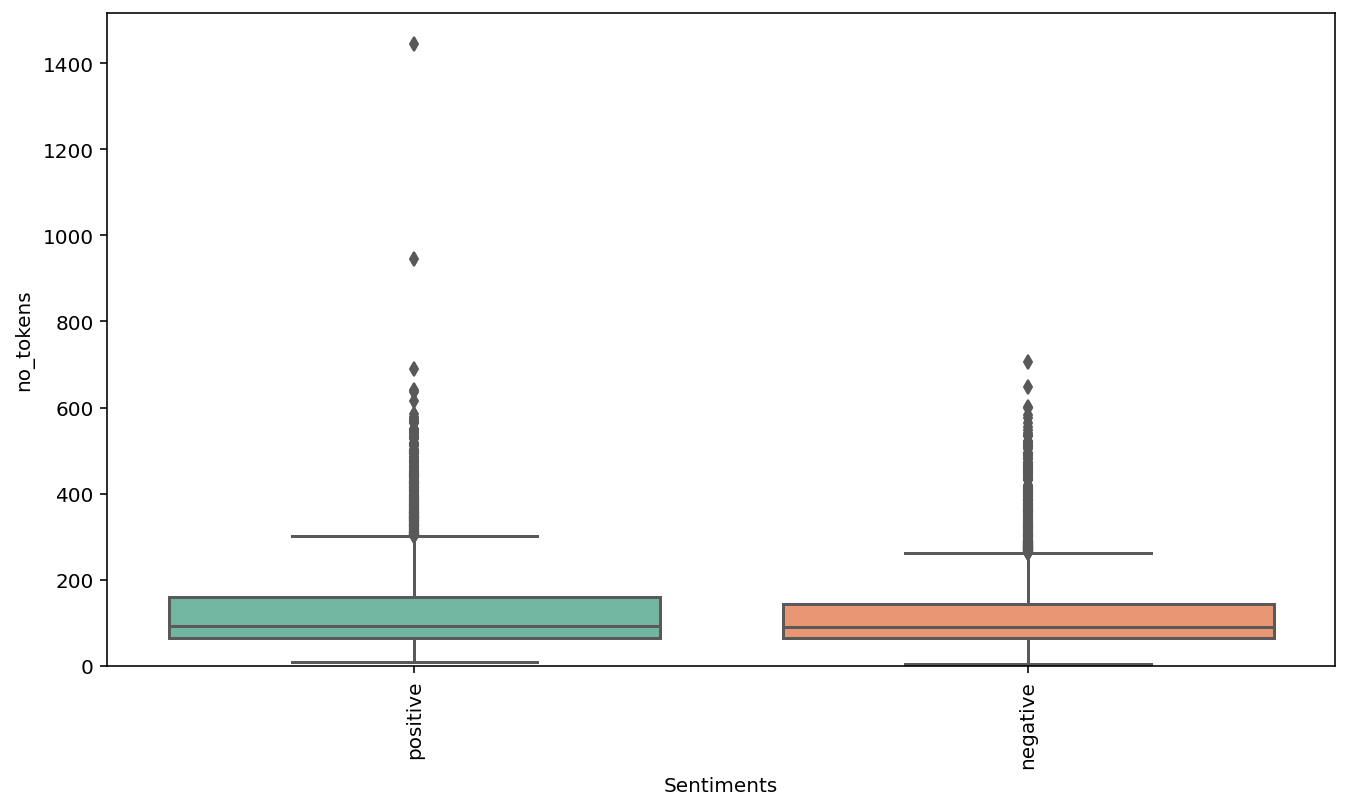

In [25]:
multi_boxplot(dataset, 'Sentiments', 'no_tokens');

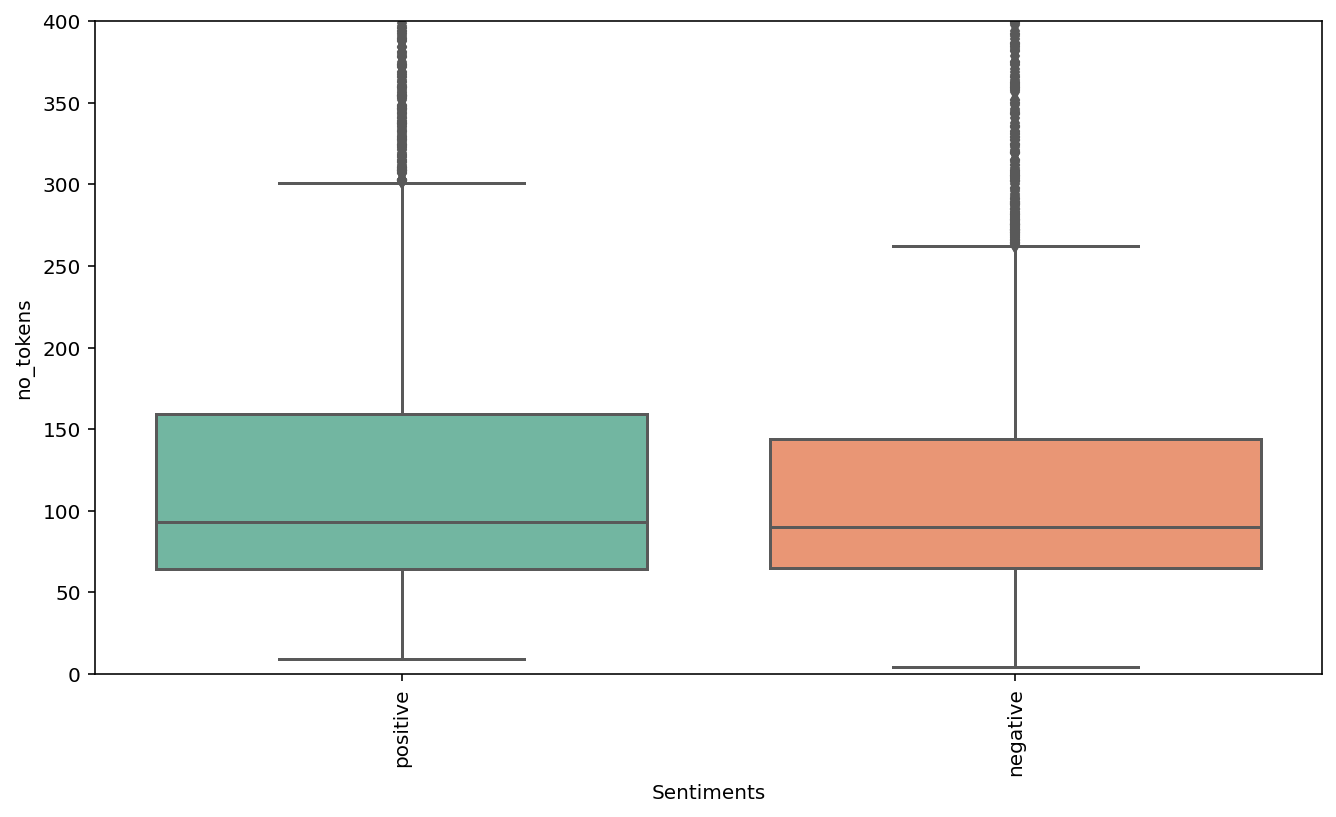

In [26]:
# cut-off diagram at y=400
multi_boxplot(dataset, 'Sentiments', 'no_tokens', ylim=400)

### 4.3.3 Exploring the dataset by observing each sentiment separately

In [27]:
# create a data frame slice (positive and negative)
sub_data_positive = dataset[dataset['Sentiments']=='positive']
sub_data_negative = dataset[dataset['Sentiments']== 'negative']

In [28]:
# transform list of documents into a single list of tokens for a subset of the reviews
tokens_positive = sub_data_positive.Reviews[:].map(my_tokenizer).sum()
tokens_negative = sub_data_negative.Reviews[:].map(my_tokenizer).sum()

# Write positive tokens to a text file
with open('positive_tokens.txt', 'w') as f:
    for item in tokens_positive:
        f.write("%s\n" % item)
        
# Write positive tokens to a text file
with open('negative_tokens.txt', 'w') as f:
    for item in tokens_negative:
        f.write("%s\n" % item)


In [53]:
# Determining the number of tokens which are common between positive and negative
common_tokens = set(tokens_positive).intersection(set(tokens_negative))
# Determine the total number of tokens
total_tokens = len(tokens_positive) + len(tokens_negative)
total_tokens

863405

In [54]:
# Calculated the percentage of tokens which are common
p_common = round((len(common_tokens)/total_tokens)*100,2)
print(str(p_common)+'%')


1.73%


In [65]:
# Print common tokens
count = 0
for elem in iter(common_tokens):
    count = count + 1
    if count == 20:
        break
    print(elem)

console
inference
kimberly
comparison
naivety
ungrateful
crotch
marvel
corrupt
damn
gruff
capital
likewise
immoral
heartbreake
last
center
elephant
fateful


### 4.3.3.a Counting frequencies 

In [29]:
from collections import Counter

# Display the 20 most common tokens for positive reviews
counter_positive = Counter(tokens_positive)
counter_positive.most_common(30)

[('not', 7808),
 ('film', 6899),
 ('movie', 6272),
 ('one', 4029),
 ('see', 3558),
 ('good', 3316),
 ('make', 2969),
 ('like', 2841),
 ('well', 2560),
 ('get', 2407),
 ('time', 2346),
 ('story', 2227),
 ('great', 2084),
 ('character', 1974),
 ('would', 1828),
 ('watch', 1825),
 ('go', 1804),
 ('show', 1766),
 ('love', 1592),
 ('also', 1550),
 ('think', 1522),
 ('really', 1464),
 ('scene', 1380),
 ('first', 1366),
 ('even', 1363),
 ('know', 1318),
 ('much', 1292),
 ('take', 1281),
 ('give', 1275),
 ('life', 1274)]

In [30]:
# Display the 20 most common tokens for negative reviews
counter_negative = Counter(tokens_negative)
counter_negative.most_common(30)

[('not', 10180),
 ('movie', 8124),
 ('film', 6202),
 ('one', 3738),
 ('make', 3369),
 ('like', 3269),
 ('see', 3151),
 ('bad', 3083),
 ('get', 2624),
 ('would', 2578),
 ('good', 2536),
 ('no', 2208),
 ('time', 2117),
 ('well', 2116),
 ('even', 2063),
 ('go', 2020),
 ('character', 2008),
 ('watch', 1954),
 ('think', 1693),
 ('really', 1686),
 ('could', 1608),
 ('look', 1607),
 ('story', 1532),
 ('scene', 1516),
 ('say', 1424),
 ('much', 1417),
 ('know', 1305),
 ('people', 1299),
 ('thing', 1245),
 ('give', 1229)]

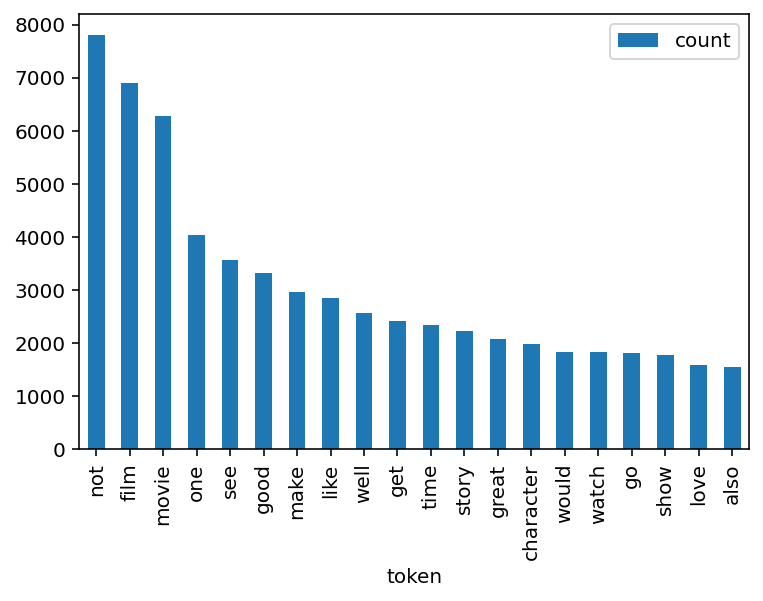

In [31]:
import matplotlib.pyplot as plt

# Plot frequency of 20 most common tokens for positive reviews
# convert list of tuples into data frame
freq_df_pos = pd.DataFrame.from_records(counter_positive.most_common(20),
                                    columns=['token', 'count'])

# create bar plot
freq_df_pos.plot(kind='bar', x='token');



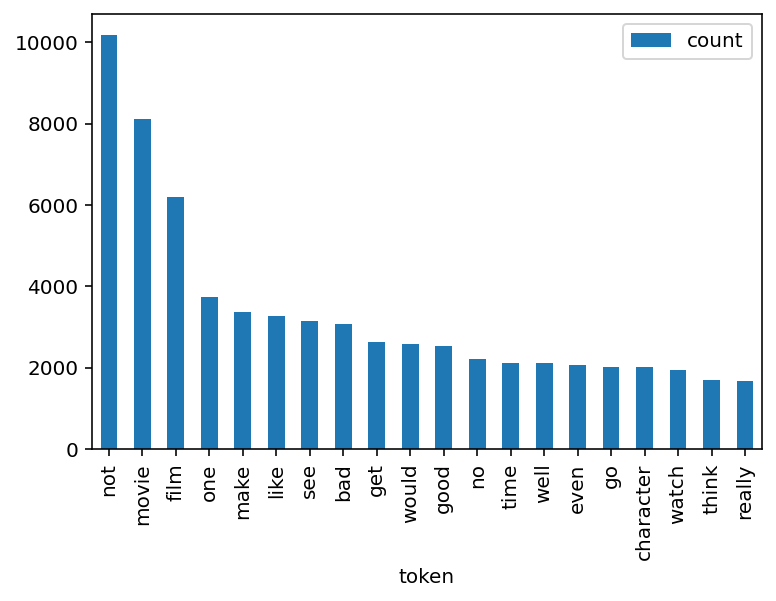

In [32]:
# Plot frequency of 20 most common tokens for negative reviews
# convert list of tuples into data frame
freq_df_neg = pd.DataFrame.from_records(counter_negative.most_common(20),
                                    columns=['token', 'count'])

# create bar plot
freq_df_neg.plot(kind='bar', x='token');

### 4.3.3.b Creating WorldClouds

In [33]:
from wordcloud import WordCloud
def wordcloud(counter):
    """A small wordloud wrapper"""
    wc = WordCloud(width=1200, height=800, 
                   background_color="white", 
                   max_words=200) 
    wc.generate_from_frequencies(counter)

    # Plot
    fig=plt.figure(figsize=(6, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

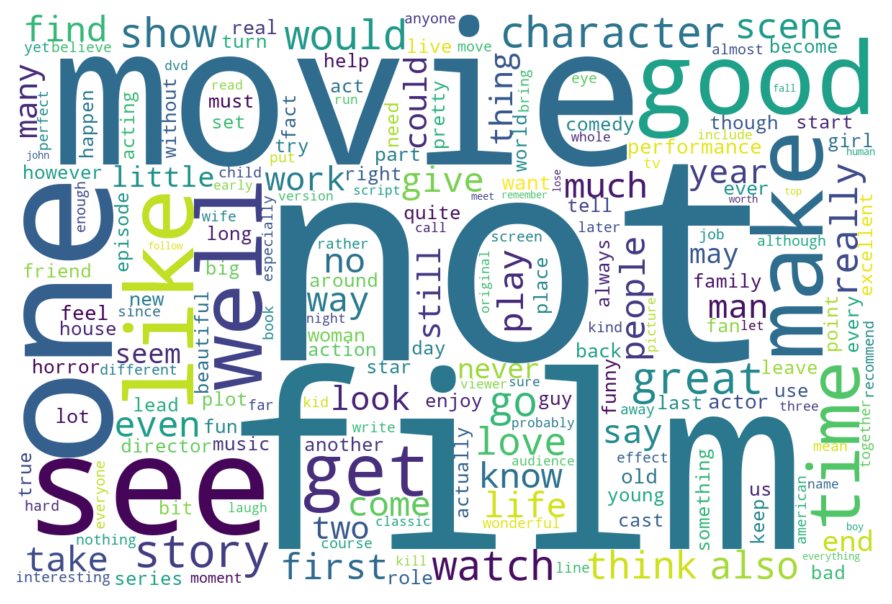

In [34]:
# Display wordcloud associated to positive reviews
wordcloud(counter_positive)


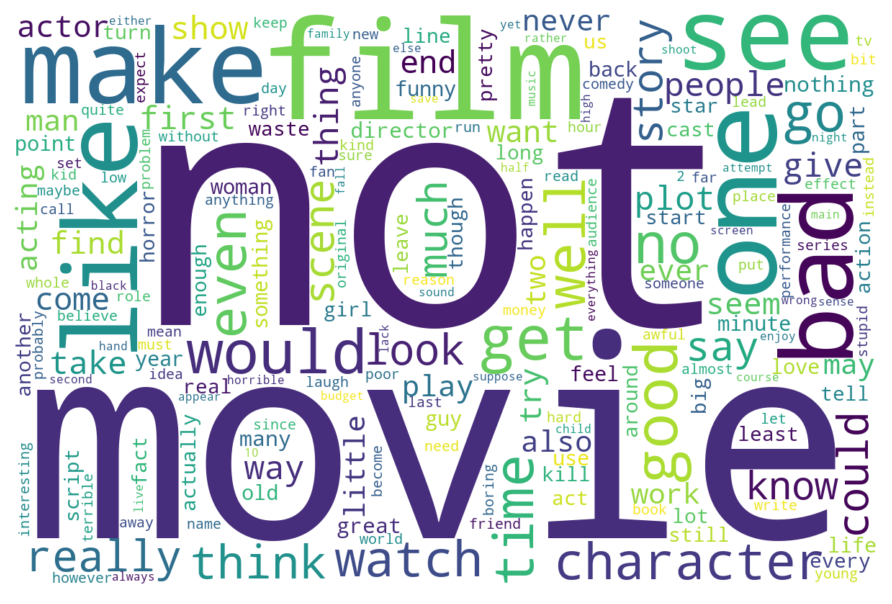

In [35]:
# Display wordcloud associated to negative reviews
wordcloud(counter_negative)

# 5. Summary of Key Findings <a class="anchor" id="5"></a>

In this section we summarize key observations which were derived from the data exploration:

1. Looking at the wordclouds, we could observe that some of the most frequeny words used in both the positive and negative reviews were similar or common. We examined the percentage of tokens which were common and determined that approximately 1.73% of the tokens were common.

2. Based on the observations in the first point, in the next phase of the project, it might be beneficial to consider using bag of n-grams to better capture the sentiment of the review.

3. The vast majority of the reviews contain between 0 and 2000 characters, which corresponds to approximately 0 to 300 words. Additionally, the average word length present in our dataset was 5 characters.
